In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./oliveyoung_review_tokenize.csv")

In [3]:
df

,item_number,brand_name,sanitary_type,item_option,review_content,absorption_encoded,stimulation_encoded,texture_encoded,nouns
0,A000000191350,마리솜,pad,,너무 귀여워서 살수 밖에 없었어요 사실 쿠로미 가지고싶었는데 마멜 당첨 됬지만 너무...,3.0,2.0,3.0,"['너무', '귀엽', '살수', '밖', '없', '사실', '쿠로미', '마멜'..."
1,A000000191350,마리솜,pad,,종류별로 다양하게 담겨있어서 좋아요 오버나이트가 급히 필요해서 뜯어 써봤는데 진짜...,2.0,3.0,2.0,"['종류', '다양', '좋', '오버나이트', '급히', '필요', '진짜', '..."
2,A000000193819,마리솜,pad,,조카가 얼마전에 생리시작해서 생리대 선물해 주려고했는데 마침 퍼스트박스 세트가 있어...,3.0,3.0,3.0,"['조카', '얼마', '전', '생리', '시작', '생리대', '선물', '마침..."
3,A000000191350,마리솜,pad,,아직 사용 전이에요 그래도 리뷰 남겨요 패키징 귀여워요 마이멜로디 기대했는데에 시나모롤툭,3.0,3.0,3.0,"['아직', '사용', '전', '리뷰', '패', '징', '귀엽', '마이멜로디..."
4,A000000191350,마리솜,pad,,박스상태 그냥 상자에 넣어서 보내버려서 택배오는동안 망가졌네요 뽁뽁이 해야할거같아...,2.0,2.0,2.0,"['박스', '상태', '그냥', '상자', '택배', '동안', '뽁뽁이', '같..."
...,...,...,...,...,...,...,...,...,...
21987,A000000006723,유기농본,pad,,세일할때 처음 써보고 그 후에 자주 사고있어요 쓰고나면 확실히 이전꺼보다 사용감좋은...,3.0,3.0,3.0,"['세일', '때', '처음', '그 후', '자주', '확실히', '이전', '사..."
21988,A000000006723,유기농본,pad,,넘무긴오버나이트만사놓는바람에적당한길이에얋은게필요했는데마침들른올리브영에서세일도하고있는...,2.0,2.0,2.0,[]
21989,A000000006723,유기농본,pad,,사용해 온 기간은 정말 오래되어서 그냥 자연스럽게 선택하는 제품입니다 특별히 나쁜 ...,3.0,3.0,3.0,"['사용', '기간', '정말', '그냥', '자연', '선택', '제품', '특별..."
21990,A000000006723,유기농본,pad,,너무좋아요 너무좋스버다 사용해보니 너무좋습니다,2.0,2.0,2.0,"['너무', '좋', '사용', '너무', '좋']"


### df.isnull().sum()

In [5]:
df["brand_name"].unique()

array(['마리솜', '좋은느낌', '라엘', '이너시아', '유기농본', '쏘피', '아임오', '라네이처', '예지미인',
       '루나', '티읕', '한나', '해피문데이', '템포', '순수한면', '화이트', '나트라케어'],
      dtype=object)

In [291]:
df["item_number"].unique()

array(['A000000191350', 'A000000193819', 'A000000192900', 'A000000191605',
       'A000000131345', 'A000000131341', 'A000000131349', 'A000000148241',
       'A000000191348', 'A000000014786', 'A000000187776', 'A000000189998',
       'A000000187774', 'A000000189999', 'A000000192669', 'A000000170423',
       'A000000014793', 'A000000114373', 'A000000105853', 'A000000117619',
       'A000000014788', 'A000000014792', 'A000000154575', 'A000000157118',
       'A000000168848', 'A000000168883', 'A000000007225', 'A000000160619',
       'A000000007229', 'A000000160621', 'A000000160821', 'A000000189827',
       'A000000189327', 'A000000172347', 'A000000189918', 'A000000154732',
       'A000000154164', 'A000000155212', 'A000000154165', 'A000000159671',
       'A000000172919', 'A000000156954', 'A000000156952', 'A000000156953',
       'A000000156946', 'A000000178799', 'A000000185976', 'A000000164619',
       'A000000164621', 'A000000164617', 'A000000155771', 'A000000180731',
       'A000000170374', '

In [145]:
# df.loc[df['brand_name'] == '유기농분', 'brand_name'] = '유기농본'

### 흡수력, 자극, 촉감 모두 nan인 것들 뽑기

In [10]:
df[(df["sanitary_type"]!="cup") & (df["absorption_encoded"].isnull()) & (df["stimulation_encoded"].isnull()) & (df["texture_encoded"].isnull())]

# 컵 타입: 958개
# 나머지: 157개

,item_number,brand_name,sanitary_type,item_option,review_content,absorption_encoded,stimulation_encoded,texture_encoded,nouns
1760,A000000191350,마리솜,pad,,너무 귀여워서 살수 밖에 없었어요 사실 쿠로미 가지고싶었는데 마멜 당첨 됬지만 너무...,NaN,NaN,NaN,"['너무', '귀엽', '살수', '밖', '없', '사실', '쿠로미', '마멜'..."
1762,A000000191350,마리솜,pad,,종류별로 다양하게 담겨있어서 좋아요 오버나이트가 급히 필요해서 뜯어 써봤는데 진짜...,NaN,NaN,NaN,"['종류', '다양', '좋', '오버나이트', '급히', '필요', '진짜', '..."
1765,A000000191350,마리솜,pad,,아직 사용 전이에요 그래도 리뷰 남겨요 패키징 귀여워요 마이멜로디 기대했는데에 시나모롤툭,NaN,NaN,NaN,"['아직', '사용', '전', '리뷰', '패', '징', '귀엽', '마이멜로디..."
1771,A000000191350,마리솜,pad,,박스상태 그냥 상자에 넣어서 보내버려서 택배오는동안 망가졌네요 뽁뽁이 해야할거같아...,NaN,NaN,NaN,"['박스', '상태', '그냥', '상자', '택배', '동안', '뽁뽁이', '같..."
1772,A000000191350,마리솜,pad,,파우치능 블랙 쿠루미가 옴양도 많구 잘 구매했어여 넘귀욤귀용,NaN,NaN,NaN,"['파우치', '능', '블랙', '쿠루', '미', '옴', '양도', '많', ..."
...,...,...,...,...,...,...,...,...,...
20017,A000000191348,마리솜,pad,헬로키티 롱라이너 20P,라이너는 자주 사용해서 항상 넉넉하게 구비해놓고 있어요,NaN,NaN,NaN,"['라이너', '자주', '사용', '항상', '넉넉', '구비']"
20018,A000000191348,마리솜,pad,헬로키티 롱라이너 20P,헬로키티NN년차 덕후로써 안살수가 없었어요 너무 기여워요 추천합니다 이렇게 키티 생...,NaN,NaN,NaN,"['헬로키티', 'NN', '덕후', '살수', '없', '너무', '추천', '이..."
20019,A000000191348,마리솜,pad,쿠로미 오버나이트 8P,잘 때는 오버나이트 자주 사용하고 있어요 순면이라 더 안심하고 사용할 수 있네요,NaN,NaN,NaN,"['잘', '때', '오버나이트', '자주', '사용', '순면', '더', '안심..."
20020,A000000191348,마리솜,pad,헬로키티 롱라이너 20P,길이 적당하고 촉감 부드러워서 잘 사용할 것 같네요 키티도 귀여워요,NaN,NaN,NaN,"['길', '적당', '촉감', '부드럽', '잘', '사용', '같', '키티',..."


In [83]:
df[(df["absorption_encoded"]==1) | (df["stimulation_encoded"]==1) | (df["texture_encoded"]==1)]

# 하나라도 1점인 것: 426개

,item_number,brand_name,sanitary_type,item_option,review_content,absorption_encoded,stimulation_encoded,texture_encoded,nouns
107,A000000192900,좋은느낌,pad,입오버 중형 4P 1+1 기획,사용 후기 일단 아쉬웠던 점은 하루특가로 홍보하는 메인 사진에는 박스에 들어 있는것...,1.0,3.0,3.0,"['사용', '후기', '일단', '아쉽', '하루', '특가', '홍보', '메인..."
163,A000000191605,좋은느낌,pad,좋은느낌 입오버 중형 3+1P,다른 브랜드에 비해 저렴해서 구매해봤는데 비추천합니다 일단 너무 간지럽고 따가워요 ...,3.0,1.0,1.0,"['브랜드', '저렴', '구매', '추천', '일단', '너무', '간지럽', '..."
174,A000000192900,좋은느낌,pad,입오버 중형 4P 1+1 기획,좋아요 흡수력이 좋아요 그래서 재구매 했는데 행사라 가성비 갑,2.0,1.0,2.0,"['좋', '흡수력', '좋', '재구매', '행사', '가성비', '갑']"
213,A000000191605,좋은느낌,pad,좋은느낌 입오버 대형 3+1P,허리 가랑이그 어느 부위도 안정적으로 고정이 안 됨 좀만 움직여도 생리대가 이리저리...,2.0,1.0,2.0,"['허리', '가랑이', '부위', '안정', '고정', '안', '좀', '생리대..."
261,A000000192900,좋은느낌,pad,입오버 대형 4P 1+1 기획,세 번째 구매인데요타사이크에서도 구매함 이거 없었을 시절엔 어케 살았나싶어요 짱편해요,1.0,1.0,1.0,"['구매', '요타', '사이크', '구매', '없', '시절', '어', '짱',..."
...,...,...,...,...,...,...,...,...,...
21751,A000000006723,유기농본,pad,,저는 엄청 예민하고 접촉성 피부염에 과민반응 환자입니다 저와 비슷한 분들의 리뷰를 ...,1.0,1.0,3.0,"['엄청', '예민', '접촉', '피부염', '과민반응', '환자', '비슷', ..."
21770,A000000006723,유기농본,pad,,엄청 얇은편이고 다른 두꺼운 생리대들 보다는 확실이 흡수량이 적긴해요 옆에 샘방지라...,1.0,3.0,3.0,"['엄청', '얇', '두껍', '생리대', '확실이', '흡수', '적기', '옆..."
21833,A000000006723,유기농본,pad,,쟁여놓은 사진보면 아시겠죠 몇 년째 이 제품만 계속해서 사용하고 있긴한데 진짜 솔직...,1.0,3.0,2.0,"['쟁여', '사', '진보면', '제품', '계속', '사용', '진짜', '솔직..."
21842,A000000006723,유기농본,pad,,오버나이트치고 흡수가 잘 안되는 느낌을 받았습니다 생리대 뒷부분이 타제품보다 넓...,1.0,3.0,3.0,"['오버나이트', '흡수', '잘', '안', '느낌', '생리대', '뒷부분', ..."


In [28]:
from matplotlib import pyplot as plt
import seaborn as sns

In [111]:
df.groupby("sanitary_type")["absorption_encoded"].sum()

sanitary_type
cup           0.0
pad       37203.0
tampon    18696.0
Name: absorption_encoded, dtype: float64

In [114]:
len(df[df["sanitary_type"]=="tampon"])

7104

In [127]:
import pandas as pd

# 데이터 생성
data = {
    'sanitary_type': ['pad', 'pad', 'pad', 'tampon', 'tampon', 'tampon'],
    'absorption_encoded': [3.0, 2.0, 1.0, 3.0, 2.0, 1.0],
    'absorp_count': [9737 / 13930, 3950 / 13930, 92 / 13930, 4638 / 7104, 2324 / 7104, 134 / 7104]
}

ratio = pd.DataFrame(data)

# 데이터프레임 출력
print(ratio)


  sanitary_type  absorption_encoded  absorp_count
0           pad                 3.0      0.698995
1           pad                 2.0      0.283561
2           pad                 1.0      0.006604
3        tampon                 3.0      0.652872
4        tampon                 2.0      0.327140
5        tampon                 1.0      0.018863


In [128]:
ratio

,sanitary_type,absorption_encoded,absorp_count
0,pad,3.0,0.698995
1,pad,2.0,0.283561
2,pad,1.0,0.006604
3,tampon,3.0,0.652872
4,tampon,2.0,0.327140
5,tampon,1.0,0.018863


In [136]:
df.groupby("sanitary_type")["review_content"].nunique()

sanitary_type
cup         722
pad       13094
tampon     5777
Name: review_content, dtype: int64

In [137]:
# pie chart
slang_usage = ["cup", "pad", "tampon"]
values = [722, 13094, 5777]

([<matplotlib.patches.Wedge at 0x17c779a10>,
 [Text(-0.12705983521178893, 1.0926370844319504, 'cup'),
  Text(-0.8695845338645942, -0.826935752319064, 'pad'),
  Text(0.879342176338847, 0.660876188791562, 'tampon')])

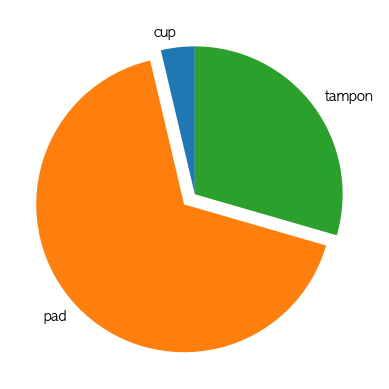

In [141]:
exp = [0, 0.1, 0]
plt.pie(values, labels=slang_usage, explode=exp, startangle=90)

In [147]:
print(df[df["sanitary_type"]=="cup"]["brand_name"].unique())

['루나' '티읕' '한나' '라엘' '해피문데이']


In [152]:
df[df["sanitary_type"]=="cup"].groupby("brand_name")["review_content"].nunique()

brand_name
라엘        21
루나       335
티읕       347
한나         8
해피문데이     12
Name: review_content, dtype: int64

In [ ]:
# 데이터프레임 생성
data = {
    'brand_name': ['라네이처', '라엘', '마리솜', '쏘피', '아임오', '예지미인', '유기농본', '이너시아', '좋은느낌'],
    'count': [485, 1100, 149, 1932, 86, 673, 1901, 950, 5854]
}

pad = pd.DataFrame(data)

In [151]:
data = {
    'brand_name': ['나트라케어', '라엘', '순수한면', '좋은느낌', '템포', '해피문데이', '화이트'],
    'count': [334, 166, 957, 111, 2575, 1073, 599]
}

tampon = pd.DataFrame(data)

In [153]:
data = {
    'brand_name': ['라엘', '루나컵', '티읕', '한나', '해피문데이'],
    'count': [21, 335, 347, 8, 12]
}

cup = pd.DataFrame(data)

In [ ]:
# 생리컵 -> "재구매" 키워드
plt.figure(figsize=(10,5))
plt.rc("font", family="AppleGothic")

plt.subplot(1, 2, 1)
plt.bar(grouped_sum_cup.index, grouped_sum_cup.values, color='blue')
plt.xticks(rotation=90)
plt.title('Repurchase Sum')

plt.subplot(1, 2, 2)
plt.bar(grouped_ratio_cup.index, grouped_ratio_cup.values, color='blue')
plt.xticks(rotation=90)
plt.title('Repurchase Ratio')

Text(0.5, 1.0, '컵형 리뷰 수')

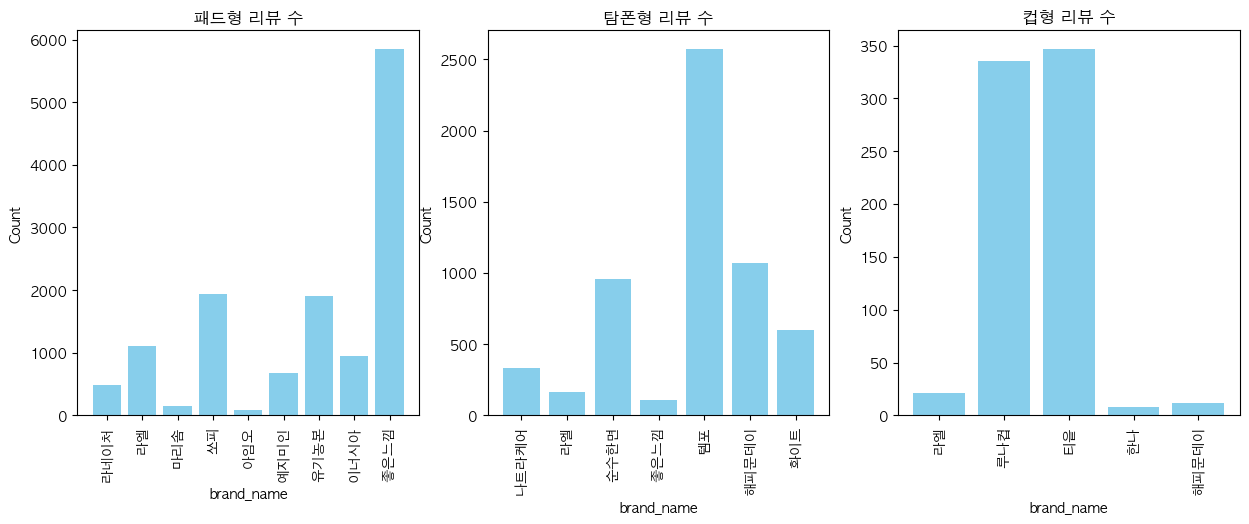

In [165]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(15,5))
plt.rc("font", family="AppleGothic")

plt.subplot(1,3,1)
plt.bar(pad['brand_name'], pad['count'], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('brand_name')
plt.ylabel('Count')
plt.title('패드형 리뷰 수')

plt.subplot(1,3,2)
plt.bar(tampon['brand_name'], tampon['count'], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('brand_name')
plt.ylabel('Count')
plt.title('탐폰형 리뷰 수')

plt.subplot(1,3,3)
plt.bar(cup['brand_name'], cup['count'], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('brand_name')
plt.ylabel('Count')
plt.title('컵형 리뷰 수')


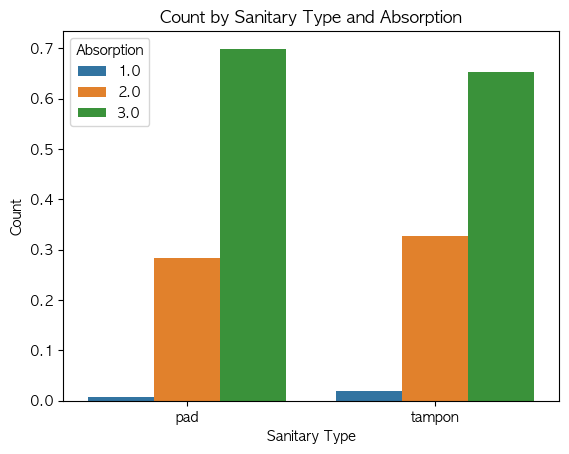

In [129]:
sns.barplot(x="sanitary_type", y="absorp_count", hue="absorption_encoded", data=ratio)
plt.title("Count by Sanitary Type and Absorption")
plt.xlabel("Sanitary Type")
plt.ylabel("Count")
plt.legend(title="Absorption")
plt.show()


In [166]:
df.groupby("sanitary_type")["absorption_encoded"].value_counts()

sanitary_type  absorption_encoded
pad            3.0                   9737
               2.0                   3950
               1.0                     92
tampon         3.0                   4638
               2.0                   2324
               1.0                    134
Name: count, dtype: int64

Text(0.5, 0, 'Texture')

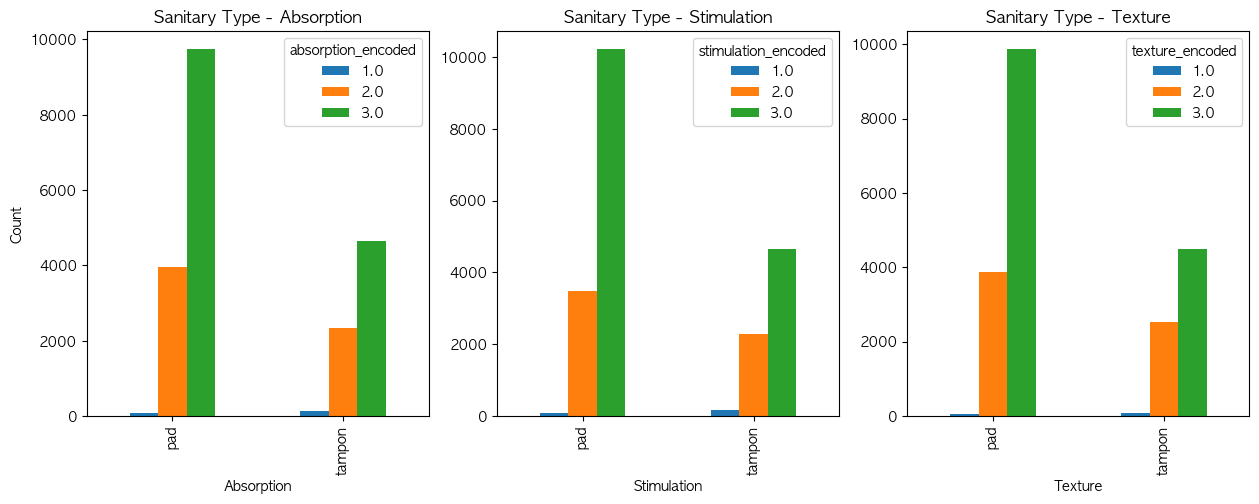

In [101]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

df.groupby("sanitary_type")["absorption_encoded"].value_counts().unstack().plot(kind="bar", stacked=False, ax=axes[0])
axes[0].set_title("Sanitary Type - Absorption")
axes[0].set_xlabel("Absorption")
axes[0].set_ylabel("Count")

df.groupby("sanitary_type")["stimulation_encoded"].value_counts().unstack().plot(kind="bar", stacked=False, ax=axes[1])
axes[1].set_title("Sanitary Type - Stimulation")
axes[1].set_xlabel("Stimulation")
# axes[1].set_ylabel("Count")

df.groupby("sanitary_type")["texture_encoded"].value_counts().unstack().plot(kind="bar", stacked=False, ax=axes[2])
axes[2].set_title("Sanitary Type - Texture")
axes[2].set_xlabel("Texture")
# axes[2].set_ylabel("Count")

In [181]:
df.groupby("sanitary_type")["absorption_encoded"].mean()

sanitary_type
cup            NaN
pad       2.699978
tampon    2.634724
Name: absorption_encoded, dtype: float64

Text(0.5, 0, 'Texture')

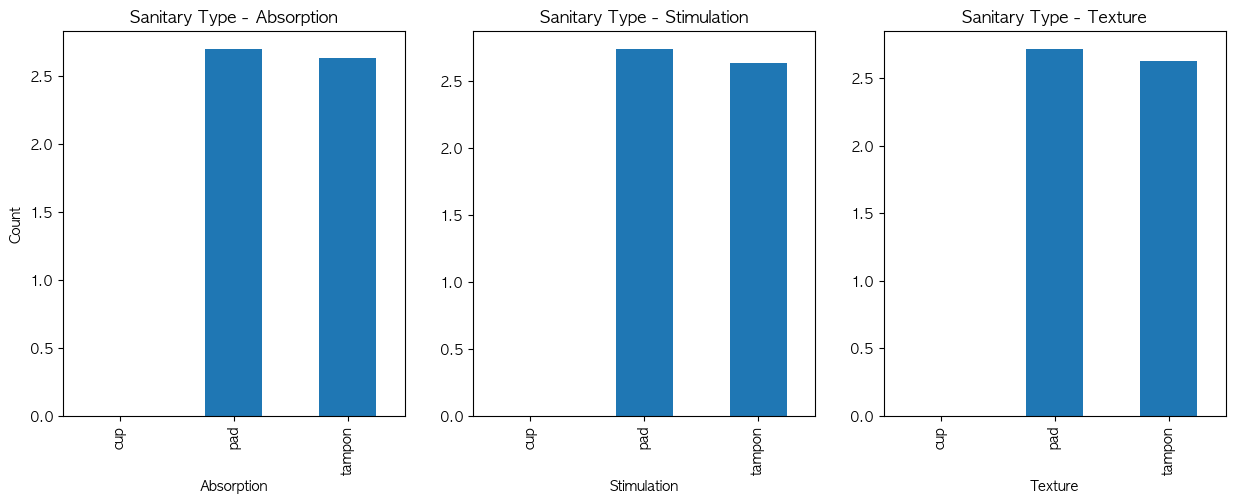

In [176]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

df.groupby("sanitary_type")["absorption_encoded"].mean().plot(kind="bar", stacked=False, ax=axes[0])
axes[0].set_title("Sanitary Type - Absorption")
axes[0].set_xlabel("Absorption")
axes[0].set_ylabel("Count")

df.groupby("sanitary_type")["stimulation_encoded"].mean().plot(kind="bar", stacked=False, ax=axes[1])
axes[1].set_title("Sanitary Type - Stimulation")
axes[1].set_xlabel("Stimulation")
# axes[1].set_ylabel("Count")

df.groupby("sanitary_type")["texture_encoded"].mean().plot(kind="bar", stacked=False, ax=axes[2])
axes[2].set_title("Sanitary Type - Texture")
axes[2].set_xlabel("Texture")
# axes[2].set_ylabel("Count")

In [147]:
df[["absorption_encoded", "stimulation_encoded", "texture_encoded"]]

,absorption_encoded,stimulation_encoded,texture_encoded
0,3.0,2.0,3.0
1,2.0,3.0,2.0
2,3.0,3.0,3.0
3,3.0,3.0,3.0
4,2.0,2.0,2.0
...,...,...,...
21987,3.0,3.0,3.0
21988,2.0,2.0,2.0
21989,3.0,3.0,3.0
21990,2.0,2.0,2.0


In [4]:
df["avg"] = df[["absorption_encoded", "stimulation_encoded", "texture_encoded"]].mean(axis=1)

In [5]:
df.head(3)

,item_number,brand_name,sanitary_type,item_option,review_content,absorption_encoded,stimulation_encoded,texture_encoded,nouns,avg
0,A000000191350,마리솜,pad,,너무 귀여워서 살수 밖에 없었어요 사실 쿠로미 가지고싶었는데 마멜 당첨 됬지만 너무...,3.0,2.0,3.0,"['너무', '귀엽', '살수', '밖', '없', '사실', '쿠로미', '마멜'...",2.666667
1,A000000191350,마리솜,pad,,종류별로 다양하게 담겨있어서 좋아요 오버나이트가 급히 필요해서 뜯어 써봤는데 진짜...,2.0,3.0,2.0,"['종류', '다양', '좋', '오버나이트', '급히', '필요', '진짜', '...",2.333333
2,A000000193819,마리솜,pad,,조카가 얼마전에 생리시작해서 생리대 선물해 주려고했는데 마침 퍼스트박스 세트가 있어...,3.0,3.0,3.0,"['조카', '얼마', '전', '생리', '시작', '생리대', '선물', '마침...",3.000000


In [130]:
df[df["sanitary_type"]=="pad"].groupby("brand_name")["review_content"].nunique()

brand_name
라네이처     485
라엘      1100
마리솜      149
쏘피      1932
아임오       86
예지미인     673
유기농본    1901
이너시아     950
좋은느낌    5854
Name: review_content, dtype: int64

# 만족도 평균 점수 가장 높은 & 낮은 제품/브랜드는?

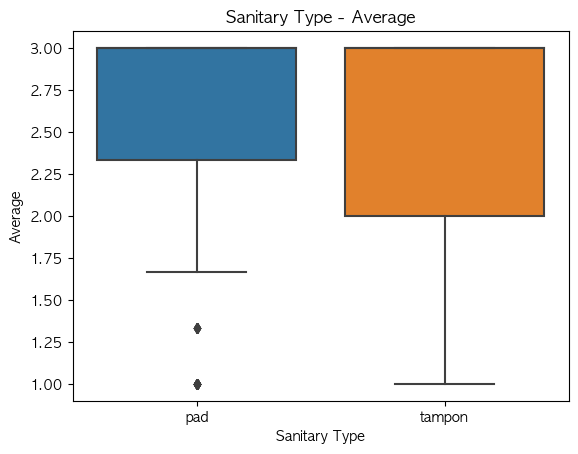

In [125]:
filtered_df = df[df["sanitary_type"].isin(["tampon", "pad"])]

# Boxplot을 그립니다.
sns.boxplot(x="sanitary_type", y="avg", data=filtered_df)

plt.title("Sanitary Type - Average")
plt.xlabel("Sanitary Type")
plt.ylabel("Average")

plt.show()

In [116]:
df[df["brand_name"]=="한나"][["sanitary_type"]]

,sanitary_type
12525,cup
12526,cup
12527,cup
12528,cup
12529,cup
12530,cup
12531,cup
12532,cup


In [139]:
df.head(2)

,item_number,brand_name,sanitary_type,item_option,review_content,absorption_encoded,stimulation_encoded,texture_encoded,nouns,avg
0,A000000191350,마리솜,pad,,너무 귀여워서 살수 밖에 없었어요 사실 쿠로미 가지고싶었는데 마멜 당첨 됬지만 너무...,3.0,2.0,3.0,"['너무', '귀엽', '살수', '밖', '없', '사실', '쿠로미', '마멜'...",2.666667
1,A000000191350,마리솜,pad,,종류별로 다양하게 담겨있어서 좋아요 오버나이트가 급히 필요해서 뜯어 써봤는데 진짜...,2.0,3.0,2.0,"['종류', '다양', '좋', '오버나이트', '급히', '필요', '진짜', '...",2.333333


In [251]:
# 생리컵 브랜드 제외
filtered_brand = df[(~df["brand_name"].isin(["루나", "티읕", "한나"]))]

In [252]:
filtered_brand.groupby("brand_name")[["absorption_encoded", "stimulation_encoded", "texture_encoded"]]\
    .mean()

,absorption_encoded,stimulation_encoded,texture_encoded
brand_name,,,
나트라케어,2.600592,2.621302,2.497041
라네이처,2.626923,2.698077,2.665385
라엘,2.682945,2.750729,2.720117
마리솜,2.618644,2.652542,2.652542
순수한면,2.569882,2.552165,2.537402
쏘피,2.684500,2.699000,2.662500
아임오,2.516129,2.666667,2.645161
예지미인,2.663421,2.706537,2.716273
유기농본,2.682678,2.806435,2.757793


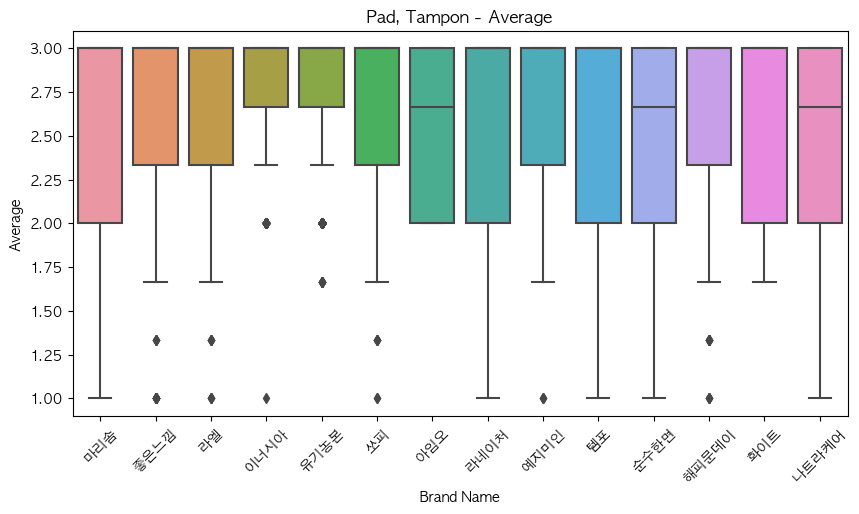

In [172]:
plt.figure(figsize=(10,5))
plt.rc("font", family="AppleGothic")
sns.boxplot(x="brand_name", y="avg", data=filtered_df)

plt.title("Pad, Tampon - Average")
plt.xlabel("Brand Name")
plt.xticks(rotation=45)
plt.ylabel("Average")

plt.show()

# 컵형 브랜드 제외

In [253]:
filtered_brand.groupby("brand_name")["brand_name"].count().sort_values()

brand_name
아임오        93
나트라케어     338
마리솜       382
라네이처      520
화이트       635
예지미인      719
이너시아      999
순수한면     1016
라엘       1393
유기농본     1958
쏘피       2000
해피문데이    2046
템포       2795
좋은느낌     6173
Name: brand_name, dtype: int64

In [168]:
pad_brand = df[df["sanitary_type"]=="pad"]

In [254]:
pad_brand.groupby("brand_name")["brand_name"].count().sort_values()

brand_name
아임오       93
마리솜      382
라네이처     520
예지미인     719
이너시아     999
라엘      1200
유기농본    1958
쏘피      2000
좋은느낌    6059
Name: brand_name, dtype: int64

In [169]:
pad_brand.groupby("brand_name")[["absorption_encoded", "stimulation_encoded", "texture_encoded"]]\
    .mean()

,absorption_encoded,stimulation_encoded,texture_encoded
brand_name,,,
라네이처,2.626923,2.698077,2.665385
라엘,2.712500,2.785000,2.753333
마리솜,2.618644,2.652542,2.652542
쏘피,2.684500,2.699000,2.662500
아임오,2.516129,2.666667,2.645161
예지미인,2.663421,2.706537,2.716273
유기농본,2.682678,2.806435,2.757793
이너시아,2.802803,2.835836,2.813814
좋은느낌,2.707845,2.708457,2.697290


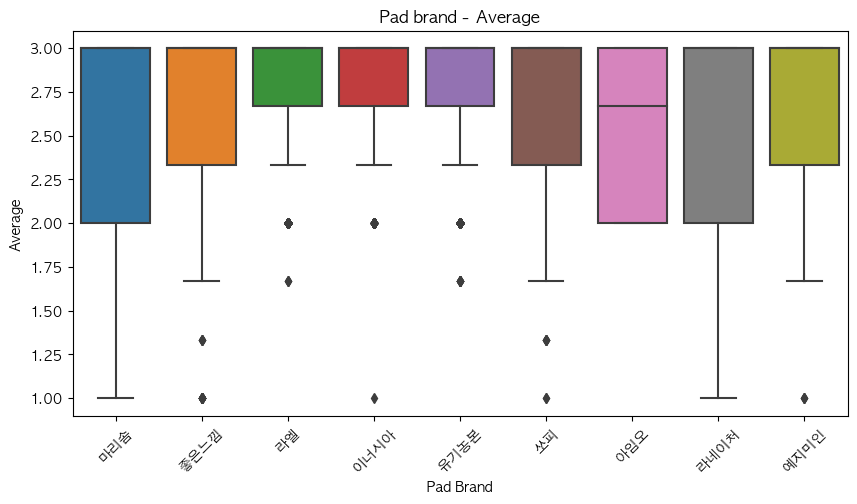

In [173]:
plt.figure(figsize=(10,5))
plt.rc("font", family="AppleGothic")
sns.boxplot(x="brand_name", y="avg", data=pad_brand)

plt.title("Pad - Average")
plt.xlabel("Pad Brand")
plt.xticks(rotation=45)
plt.ylabel("Average")

plt.show()

In [53]:
tampon_brand = df[df["sanitary_type"]=="tampon"]

In [54]:
tampon_brand.groupby("brand_name")["brand_name"].count().sort_values()

brand_name
좋은느낌      114
라엘        172
나트라케어     338
화이트       635
순수한면     1016
해피문데이    2034
템포       2795
Name: brand_name, dtype: int64

In [55]:
tampon_brand.groupby("brand_name")[["absorption_encoded", "stimulation_encoded", "texture_encoded"]]\
    .mean()

,absorption_encoded,stimulation_encoded,texture_encoded
brand_name,,,
나트라케어,2.600592,2.621302,2.497041
라엘,2.476744,2.511628,2.488372
순수한면,2.569882,2.552165,2.537402
좋은느낌,2.614035,2.649123,2.640351
템포,2.640832,2.614998,2.607104
해피문데이,2.684857,2.718781,2.712389
화이트,2.615748,2.622047,2.644094


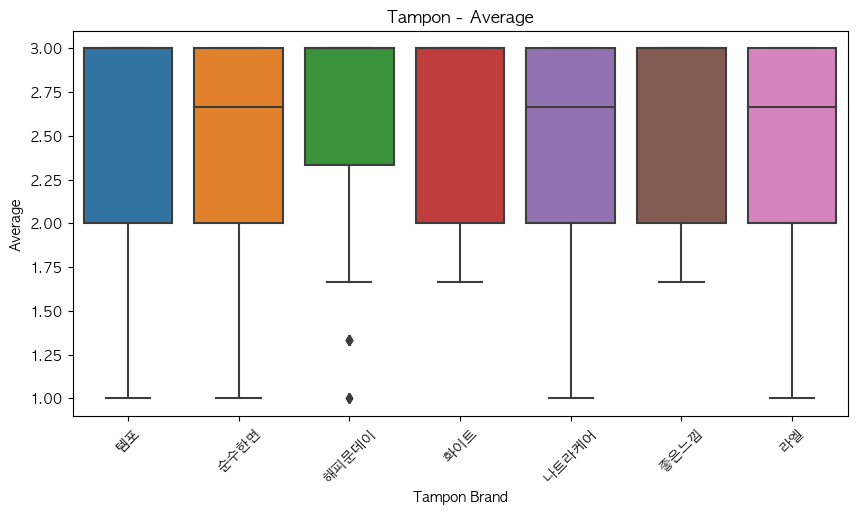

In [56]:
plt.figure(figsize=(10,5))
plt.rc("font", family="AppleGothic")
sns.boxplot(x="brand_name", y="avg", data=tampon_brand)

plt.title("Tampon - Average")
plt.xlabel("Tampon Brand")
plt.xticks(rotation=45)
plt.ylabel("Average")

plt.show()

# 가설1) 탐폰이 패드보다 흡수율 만족도가 높을 것이다.
- 탐폰과 패드의 absorption_encoded 값의 평균으로 계산

In [31]:
df[(df["sanitary_type"]=="tampon")]

,item_number,brand_name,sanitary_type,item_option,review_content,absorption_encoded,stimulation_encoded,texture_encoded,nouns
12777,A000000164619,템포,tampon,템포 내추럴 슈퍼 10P,잘 쓰고 있는 제품입니다 세일을 노려서 구매하면 싸게 살수도 있습니디,2.0,3.0,3.0,"['잘', '제품', '세일', '구매', '살수']"
12778,A000000164619,템포,tampon,템포 내추럴 레귤러 10P,템포를 쓰기 전과 후는 완전 달라요 너무 편해요 생리대는 다시 못 쓸 거 같아요,3.0,3.0,3.0,"['템포', '쓰기', '전과', '후', '완전', '다르', '너무', '편하'..."
12779,A000000164619,템포,tampon,템포 내추럴 슈퍼 10P,양많은 날 사용하기 좋아요 수영장 갈때 사용하는 편입니다,3.0,2.0,2.0,"['양', '많', '날', '사용', '좋', '수영장', '때', '사용']"
12780,A000000164619,템포,tampon,템포 내추럴 레귤러 10P,다른 탐폰들보다 좀더 사용이 편리한것 같아요 잘 쓰고 있습니다,3.0,3.0,3.0,"['탐폰', '좀', '더', '사용', '편리', '같', '잘']"
12781,A000000164619,템포,tampon,템포 내추럴 슈퍼 10P,한번만 쓰는 사람은 없을것 같은데 생리대때문에 피부가 너무 짓무르고 상해서 시작즈음...,3.0,2.0,3.0,"['사람', '없', '같', '생리대', '피부', '너무', '짓', '시작',..."
...,...,...,...,...,...,...,...,...,...
19876,A000000173458,라엘,tampon,라엘 컴팩트 순면 탐폰 레귤러,컴팩트가 가지고 다니기 아주 좋고 오랫동안 써왓던 제품이고 만족스럽습니다,3.0,3.0,3.0,"['컴팩트', '아주', '좋', '오랫동안', '제품', '만족']"
19877,A000000173458,라엘,tampon,라엘 컴팩트 순면 탐폰 라이트,최근 탐폰 사용하는 날이 많은데 컴팩트해서 보관하고 좋습니다,2.0,2.0,2.0,"['최근', '탐폰', '사용', '날', '많', '컴팩트', '보관', '좋']"
19878,A000000173458,라엘,tampon,라엘 컴팩트 순면 탐폰 슈퍼,기존에 사용했던 탐폰은 흡수력이 만족스럽지 않아서 새롭게 구매해 보았습니다,2.0,3.0,2.0,"['기존', '사용', '탐폰', '흡수력', '만족', '새롭', '구매']"
19879,A000000173458,라엘,tampon,라엘 컴팩트 순면 탐폰 슈퍼,다른 탐폰들과 달라서 낯설긴 했지만 일반 탐폰과 별다를게 없어요 좀 더 사용해봐야겠...,2.0,2.0,2.0,"['탐폰', '다르', '낯설', '일반', '탐폰', '별다르', '없', '좀'..."


In [51]:
tampon_rows = df[df["sanitary_type"] == "tampon"]
pad_rows = df[df["sanitary_type"] == "pad"]

In [59]:
tampon_abs_score = tampon_rows["absorption_encoded"].mean()
tampon_abs_score

2.6347237880496053

In [60]:
pad_abs_score = pad_rows["absorption_encoded"].mean()
pad_abs_score

2.699978227737862

In [74]:
df.groupby(["sanitary_type"])[["absorption_encoded", "stimulation_encoded", "texture_encoded"]].mean()

,absorption_encoded,stimulation_encoded,texture_encoded
sanitary_type,,,
cup,NaN,NaN,NaN
pad,2.699978,2.735177,2.712834
tampon,2.634724,2.634724,2.623027


### 패드의 평균점수가 통계적으로 정말 높은 것일까?
- t-test로 검정

In [63]:
from scipy import stats

#### 등분산 검정
- H0: 이분산
- H1: 등분산

In [77]:
# from scipy import stats

# test_names = ["absorption_encoded", "stimulation_encoded", "texture_encoded"]

# tampon_scores = df[df['sanitary_type'] == 'tampon'][['absorption_encoded', 'stimulation_encoded', 'texture_encoded']]
# pad_scores = df[df['sanitary_type'] == 'pad'][['absorption_encoded', 'stimulation_encoded', 'texture_encoded']]

# for test_name in test_names:
#     _, p_value_levene = stats.levene(tampon_scores[test_name], pad_scores[test_name])
#     if p_value_levene > 0.05:
#         print(f"{test_name} p-value: {p_value_levene}, 등분산 가정 만족")
#     else:
#         print(f"{test_name} p-value: {p_value_levene}, 이분산 가정 만족")
        
# # 결측치가 있어서 nan값 반환함

In [78]:
from scipy import stats

test_names = ["absorption_encoded", "stimulation_encoded", "texture_encoded"]

tampon_scores = df[df['sanitary_type'] == 'tampon'][['absorption_encoded', 'stimulation_encoded', 'texture_encoded']]
pad_scores = df[df['sanitary_type'] == 'pad'][['absorption_encoded', 'stimulation_encoded', 'texture_encoded']]

for test_name in test_names:
    # 결측치를 제거한 후 등분산 검정 수행
    tampon_data = tampon_scores[test_name].dropna()
    pad_data = pad_scores[test_name].dropna()

    _, p_value_levene = stats.levene(tampon_data, pad_data)
    if p_value_levene > 0.05:
        print(f"{test_name} p-value: {p_value_levene}, 등분산 가정 만족")
    else:
        print(f"{test_name} p-value: {p_value_levene}, 이분산 가정 만족")
        
# 모두 이분산 가정을 만족함

absorption_encoded p-value: 7.252478056665965e-20, 이분산 가정 만족
stimulation_encoded p-value: 3.0200106679055215e-46, 이분산 가정 만족
texture_encoded p-value: 4.360187212184865e-38, 이분산 가정 만족


#### t-test 진행
- H0: 두 그룹의 평균의 차이는 0이다. => 두 그룹의 평균이 같다.
- H1: tampon 흡수율 점수 평균이 pad 흡수율의 점수 평균보다 작다.

In [82]:
t_statistic, p_value = stats.ttest_ind(
    a=tampon_scores,
    b=pad_scores,
    alternative="less",    # a < b
    equal_var=False,
    nan_policy="omit"     # nan값 무시하고 진행
)
print(f"p-value: {p_value}")
print(f"귀무 가설 기각: {p_value < 0.05}")

# pad 흡수율 평균 점수가 tampon 흡수율 평균 점수보다 통계적으로 높다고 할 수 있다.
# 또한, 나머지 자극 평균 점수와 촉감 평균 점수 모두 pad가 tampon보다 높다.

p-value: [4.40455278e-19 1.66825014e-42 3.87569542e-36]
귀무 가설 기각: [ True  True  True]


# 가설2) 이너시아 vs 좋은느김 평균 만족도 비교
- 이너시아 평균 점수가 좋은느낌 평균 점수보다 통계적으로 높은지 t-test로 검정

In [182]:
filtered_brand = df[(df["brand_name"].isin(["이너시아", "좋은느낌"])) & (df["sanitary_type"]=="pad")]
# filtered_brand

#### 등분산 검정
- H0: 이분산
- H1: 등분산

In [269]:
from scipy import stats

test_names = ["absorption_encoded", "stimulation_encoded", "texture_encoded", "avg"]

innersia_scores = df[(df['brand_name'] == '이너시아') & (df["sanitary_type"]=="pad")][["absorption_encoded", "stimulation_encoded", "texture_encoded", "avg"]]
feelgood_scores = df[(df['brand_name'] == '좋은느낌') & (df["sanitary_type"]=="pad")][["absorption_encoded", "stimulation_encoded", "texture_encoded", "avg"]]

for test_name in test_names:
    # 결측치를 제거한 후 등분산 검정 수행
    innersia_data = innersia_scores[test_name].dropna()
    feelgood_data = feelgood_scores[test_name].dropna()

    _, p_value_levene = stats.levene(innersia_data, feelgood_data)
    if p_value_levene > 0.05:
        print(f"{test_name} p-value: {p_value_levene}, 등분산 가정 만족")
    else:
        print(f"{test_name} p-value: {p_value_levene}, 이분산 가정 만족")
        
# 모두 이분산 가정을 만족함

absorption_encoded p-value: 1.3868906504511474e-09, 이분산 가정 만족
stimulation_encoded p-value: 5.177768254692134e-16, 이분산 가정 만족
texture_encoded p-value: 1.048266045871896e-13, 이분산 가정 만족
avg p-value: 2.1120296643755174e-15, 이분산 가정 만족


#### t-test 진행
- H0: 두 그룹의 평균이 같다.
- H1: 이너시아 평균 점수가 좋은느낌(패드) 평균 점수보다 높을 것이다.

In [181]:
t_statistic, p_value = stats.ttest_ind(
    a=innersia_scores,
    b=feelgood_scores,
    alternative="greater",    # a > b
    equal_var=False,
    nan_policy="omit"     # nan값 무시하고 진행
)
print(f"p-value: {p_value}")
print(f"귀무 가설 기각: {p_value < 0.05}")

p-value: [1.15298164e-11 2.56970783e-21 3.29872825e-17 1.17518537e-19]
귀무 가설 기각: [ True  True  True  True]


In [183]:
# 이너시아 전체 평점에 대한 각 점수별 평점 비율
# 3점, 2점, 1점이 몇%인

In [189]:
innersia = df[df["brand_name"]=='이너시아'][["absorption_encoded", "stimulation_encoded", "texture_encoded"]]

In [190]:
innersia

,absorption_encoded,stimulation_encoded,texture_encoded
2896,3.0,3.0,3.0
2897,3.0,3.0,3.0
2898,3.0,3.0,3.0
2899,2.0,2.0,2.0
2900,3.0,3.0,3.0
...,...,...,...
3890,3.0,2.0,2.0
3891,3.0,3.0,3.0
3892,3.0,3.0,3.0
3893,3.0,3.0,3.0


#### 흡수력 각 점수 비율

In [214]:
# "brand_name"이 '이너시아'이고, "absorption_encoded" 값이 3인 행들을 선택합니다.
innersia_3 = df[(df["brand_name"] == '이너시아') & (df["absorption_encoded"] == 3.0)]

# 선택된 행들 중 "absorption_encoded" 값이 3인 비율을 계산합니다.
innersia_3_ratio = len(innersia_3) / len(df[df["brand_name"] == '이너시아'])

print(f"The ratio of absorption_encoded being 3 for 이너시아: {innersia_3_ratio:.2%}")

The ratio of absorption_encoded being 3 for 이너시아: 80.48%


In [216]:
innersia_2 = df[(df["brand_name"] == '이너시아') & (df["absorption_encoded"] == 2.0)]
innersia_2_ratio = len(innersia_2) / len(df[df["brand_name"] == '이너시아'])

print(f"The ratio of absorption_encoded being 2 for 이너시아: {innersia_2_ratio:.2%}")

The ratio of absorption_encoded being 2 for 이너시아: 19.32%


In [217]:
innersia_1 = df[(df["brand_name"] == '이너시아') & (df["absorption_encoded"] == 1.0)]
innersia_1_ratio = len(innersia_1) / len(df[df["brand_name"] == '이너시아'])

print(f"The ratio of absorption_encoded being 1 for 이너시아: {innersia_1_ratio:.2%}")

The ratio of absorption_encoded being 1 for 이너시아: 0.20%


In [219]:
# "brand_name"이 '좋은느낌'이고, "absorption_encoded" 값이 3인 행들을 선택합니다.
feelgood_pad_3 = df[(df["brand_name"] == '좋은느낌') & (df["absorption_encoded"] == 3.0) & (df["sanitary_type"] == "pad")]

# 선택된 행들 중 "absorption_encoded" 값이 3인 비율을 계산합니다.
feelgood_pad_3_ratio = (len(feelgood_pad_3) / len(df[(df["brand_name"] == '좋은느낌') & (df["sanitary_type"]=="pad")]))

print(f"The ratio of absorption_encoded being 3 for 좋은느낌: {absorption_3_ratio:.2%}")

The ratio of absorption_encoded being 3 for 좋은느낌: 71.30%


In [221]:
feelgood_pad_2 = df[(df["brand_name"] == '좋은느낌') & (df["absorption_encoded"] == 2.0) & (df["sanitary_type"] == "pad")]
feelgood_pad_2_ratio = (len(feelgood_pad_2) / len(df[(df["brand_name"] == '좋은느낌') & (df["sanitary_type"]=="pad")]))

print(f"The ratio of absorption_encoded being 2 for 좋은느낌: {absorption_2_ratio:.2%}")

The ratio of absorption_encoded being 2 for 좋은느낌: 19.32%


In [222]:
feelgood_pad_1 = df[(df["brand_name"] == '좋은느낌') & (df["absorption_encoded"] == 1.0) & (df["sanitary_type"] == "pad")]
feelgood_pad_1_ratio = (len(feelgood_pad_1) / len(df[(df["brand_name"] == '좋은느낌') & (df["sanitary_type"]=="pad")]))

print(f"The ratio of absorption_encoded being 1 for 좋은느낌: {feelgood_pad_1_ratio:.2%}")

The ratio of absorption_encoded being 1 for 좋은느낌: 0.56%


In [235]:
absorption_ratio_df = pd.DataFrame()
absorption_ratio_df['pad_brand'] = ['이너시아','좋은느낌']
absorption_ratio_df['흡수_3점 비율'] = [innersia_3_ratio * 100, feelgood_pad_3_ratio * 100]
absorption_ratio_df['흡수_2점 비율'] = [innersia_2_ratio * 100, feelgood_pad_2_ratio * 100]
absorption_ratio_df['흡수_1점 비율'] = [innersia_1_ratio * 100, feelgood_pad_1_ratio * 100]


In [236]:
absorption_ratio_df

,pad_brand,흡수_3점 비율,흡수_2점 비율,흡수_1점 비율
0,이너시아,83.783784,16.016016,0.200200
1,좋은느낌,71.562964,27.578808,0.775706


#### 자극 각 점수별 비율

In [228]:
# "brand_name"이 '이너시아'이고, "stimulation_encoded" 값이 3인 행들을 선택합니다.
innersia_3 = df[(df["brand_name"] == '이너시아') & (df["stimulation_encoded"] == 3.0)]

# 선택된 행들 중 "absorption_encoded" 값이 3인 비율을 계산합니다.
innersia_3_ratio = len(innersia_3) / len(df[df["brand_name"] == '이너시아'])

print(f"The ratio of stimulation_encoded being 3 for 이너시아: {innersia_3_ratio:.2%}")

The ratio of stimulation_encoded being 3 for 이너시아: 83.78%


In [230]:
innersia_2 = df[(df["brand_name"] == '이너시아') & (df["stimulation_encoded"] == 2.0)]
innersia_2_ratio = len(innersia_2) / len(df[df["brand_name"] == '이너시아'])

print(f"The ratio of stimulation_encoded being 2 for 이너시아: {innersia_2_ratio:.2%}")

The ratio of stimulation_encoded being 2 for 이너시아: 16.02%


In [231]:
innersia_1 = df[(df["brand_name"] == '이너시아') & (df["stimulation_encoded"] == 1.0)]
innersia_1_ratio = len(innersia_1) / len(df[df["brand_name"] == '이너시아'])

print(f"The ratio of stimulation_encoded being 1 for 이너시아: {innersia_1_ratio:.2%}")

The ratio of stimulation_encoded being 1 for 이너시아: 0.20%


In [232]:
# "brand_name"이 '좋은느낌'이고, "stimulation_encoded" 값이 3인 행들을 선택합니다.
feelgood_pad_3 = df[(df["brand_name"] == '좋은느낌') & (df["stimulation_encoded"] == 3.0) & (df["sanitary_type"] == "pad")]

# 선택된 행들 중 "absorption_encoded" 값이 3인 비율을 계산합니다.
feelgood_pad_3_ratio = (len(feelgood_pad_3) / len(df[(df["brand_name"] == '좋은느낌') & (df["sanitary_type"]=="pad")]))

print(f"The ratio of stimulation_encoded being 3 for 좋은느낌: {absorption_3_ratio:.2%}")

The ratio of stimulation_encoded being 3 for 좋은느낌: 71.30%


In [233]:
feelgood_pad_2 = df[(df["brand_name"] == '좋은느낌') & (df["stimulation_encoded"] == 2.0) & (df["sanitary_type"] == "pad")]
feelgood_pad_2_ratio = (len(feelgood_pad_2) / len(df[(df["brand_name"] == '좋은느낌') & (df["sanitary_type"]=="pad")]))

print(f"The ratio of stimulation_encoded being 2 for 좋은느낌: {absorption_2_ratio:.2%}")

The ratio of stimulation_encoded being 2 for 좋은느낌: 19.32%


In [234]:
feelgood_pad_1 = df[(df["brand_name"] == '좋은느낌') & (df["stimulation_encoded"] == 1.0) & (df["sanitary_type"] == "pad")]
feelgood_pad_1_ratio = (len(feelgood_pad_1) / len(df[(df["brand_name"] == '좋은느낌') & (df["sanitary_type"]=="pad")]))

print(f"The ratio of stimulation_encoded being 1 for 좋은느낌: {feelgood_pad_1_ratio:.2%}")

The ratio of stimulation_encoded being 1 for 좋은느낌: 0.78%


In [238]:
stimulation_ratio_df = pd.DataFrame()
stimulation_ratio_df['pad_brand'] = ['이너시아','좋은느낌']
stimulation_ratio_df['자극_3점 비율'] = [innersia_3_ratio * 100, feelgood_pad_3_ratio * 100]
stimulation_ratio_df['자극_2점 비율'] = [innersia_2_ratio * 100, feelgood_pad_2_ratio * 100]
stimulation_ratio_df['자극_1점 비율'] = [innersia_1_ratio * 100, feelgood_pad_1_ratio * 100]

In [239]:
stimulation_ratio_df

,pad_brand,자극_3점 비율,자극_2점 비율,자극_1점 비율
0,이너시아,83.783784,16.016016,0.200200
1,좋은느낌,71.562964,27.578808,0.775706


#### 촉감 각 점수별 비율

In [240]:
# "brand_name"이 '이너시아'이고, "stimulation_encoded" 값이 3인 행들을 선택합니다.
innersia_3 = df[(df["brand_name"] == '이너시아') & (df["texture_encoded"] == 3.0)]

# 선택된 행들 중 "absorption_encoded" 값이 3인 비율을 계산합니다.
innersia_3_ratio = len(innersia_3) / len(df[df["brand_name"] == '이너시아'])

print(f"The ratio of texture_encoded being 3 for 이너시아: {innersia_3_ratio:.2%}")

The ratio of texture_encoded being 3 for 이너시아: 81.48%


In [241]:
innersia_2 = df[(df["brand_name"] == '이너시아') & (df["texture_encoded"] == 2.0)]
innersia_2_ratio = len(innersia_2) / len(df[df["brand_name"] == '이너시아'])

print(f"The ratio of texture_encoded being 2 for 이너시아: {innersia_2_ratio:.2%}")

The ratio of texture_encoded being 2 for 이너시아: 18.42%


In [242]:
innersia_1 = df[(df["brand_name"] == '이너시아') & (df["texture_encoded"] == 1.0)]
innersia_1_ratio = len(innersia_1) / len(df[df["brand_name"] == '이너시아'])

print(f"The ratio of texture_encoded being 1 for 이너시아: {innersia_1_ratio:.2%}")

The ratio of texture_encoded being 1 for 이너시아: 0.10%


In [243]:
# "brand_name"이 '좋은느낌'이고, "stimulation_encoded" 값이 3인 행들을 선택합니다.
feelgood_pad_3 = df[(df["brand_name"] == '좋은느낌') & (df["texture_encoded"] == 3.0) & (df["sanitary_type"] == "pad")]

# 선택된 행들 중 "absorption_encoded" 값이 3인 비율을 계산합니다.
feelgood_pad_3_ratio = (len(feelgood_pad_3) / len(df[(df["brand_name"] == '좋은느낌') & (df["sanitary_type"]=="pad")]))

print(f"The ratio of texture_encoded being 3 for 좋은느낌: {absorption_3_ratio:.2%}")

The ratio of texture_encoded being 3 for 좋은느낌: 71.30%


In [244]:
feelgood_pad_2 = df[(df["brand_name"] == '좋은느낌') & (df["texture_encoded"] == 2.0) & (df["sanitary_type"] == "pad")]
feelgood_pad_2_ratio = (len(feelgood_pad_2) / len(df[(df["brand_name"] == '좋은느낌') & (df["sanitary_type"]=="pad")]))

print(f"The ratio of texture_encoded being 2 for 좋은느낌: {absorption_2_ratio:.2%}")

The ratio of texture_encoded being 2 for 좋은느낌: 19.32%


In [245]:
feelgood_pad_1 = df[(df["brand_name"] == '좋은느낌') & (df["texture_encoded"] == 1.0) & (df["sanitary_type"] == "pad")]
feelgood_pad_1_ratio = (len(feelgood_pad_1) / len(df[(df["brand_name"] == '좋은느낌') & (df["sanitary_type"]=="pad")]))

print(f"The ratio of texture_encoded being 1 for 좋은느낌: {feelgood_pad_1_ratio:.2%}")

The ratio of texture_encoded being 1 for 좋은느낌: 0.40%


In [246]:
texture_ratio_df = pd.DataFrame()
texture_ratio_df['pad_brand'] = ['이너시아','좋은느낌']
texture_ratio_df['촉감_3점 비율'] = [innersia_3_ratio * 100, feelgood_pad_3_ratio * 100]
texture_ratio_df['촉감_2점 비율'] = [innersia_2_ratio * 100, feelgood_pad_2_ratio * 100]
texture_ratio_df['촉감_1점 비율'] = [innersia_1_ratio * 100, feelgood_pad_1_ratio * 100]

In [247]:
texture_ratio_df

,pad_brand,촉감_3점 비율,촉감_2점 비율,촉감_1점 비율
0,이너시아,81.481481,18.418418,0.100100
1,좋은느낌,70.044562,29.443803,0.396105


# 가설3) 해피문데이 vs 템포 평균 만족도 비교
- 해피문데이 평균 점수가 템포 평균 점수보다 통계적으로 높은지 t-test로 검정

In [266]:
filtered_brand = df[(df["brand_name"].isin(["템포", "해피문데이"])) & (df["sanitary_type"]=="tampon")]
# filtered_brand

#### 등분산 검정
- H0: 이분산
- H1: 등분산

In [278]:
df.head(2)

,item_number,brand_name,sanitary_type,item_option,review_content,absorption_encoded,stimulation_encoded,texture_encoded,nouns,avg
0,A000000191350,마리솜,pad,,너무 귀여워서 살수 밖에 없었어요 사실 쿠로미 가지고싶었는데 마멜 당첨 됬지만 너무...,3.0,2.0,3.0,"['너무', '귀엽', '살수', '밖', '없', '사실', '쿠로미', '마멜'...",2.666667
1,A000000191350,마리솜,pad,,종류별로 다양하게 담겨있어서 좋아요 오버나이트가 급히 필요해서 뜯어 써봤는데 진짜...,2.0,3.0,2.0,"['종류', '다양', '좋', '오버나이트', '급히', '필요', '진짜', '...",2.333333


In [281]:
filtered_brand.isnull().sum()

item_number            0
brand_name             0
sanitary_type          0
item_option            0
review_content         0
absorption_encoded     8
stimulation_encoded    8
texture_encoded        8
nouns                  0
avg                    8
dtype: int64

In [283]:
from scipy import stats

test_names = ["absorption_encoded", "stimulation_encoded", "texture_encoded", "avg"]

tempo_scores = df[(df['brand_name'] == '템포') & (df["sanitary_type"]=="tampon")][["absorption_encoded", "stimulation_encoded", "texture_encoded", "avg"]]
happymoonday_scores = df[(df['brand_name'] == '해피문데이') & (df["sanitary_type"]=="tampon")][["absorption_encoded", "stimulation_encoded", "texture_encoded", "avg"]]

for test_name in test_names:
    # 결측치를 제거한 후 등분산 검정 수행
    tempo_data = tempo_scores[test_name].dropna()
    happymoonday_data = happymoonday_scores[test_name].dropna()

    _, p_value_levene = stats.levene(tempo_data, happymoonday_data)
    if p_value_levene > 0.05:
        print(f"{test_name} p-value: {p_value_levene}, 등분산 가정 만족")
    else:
        print(f"{test_name} p-value: {p_value_levene}, 이분산 가정 만족")
        
# 모두 이분산 가정을 만족함

absorption_encoded p-value: 0.0028712477300827173, 이분산 가정 만족
stimulation_encoded p-value: 2.4558270157768917e-12, 이분산 가정 만족
texture_encoded p-value: 1.4686016370191568e-13, 이분산 가정 만족
avg p-value: 4.97774801603303e-11, 이분산 가정 만족


#### t-test 진행
- H0: 두 그룹의 평균이 같다.
- H1: 해피문데이 평균 점수가 템포 평균 점수보다 높을 것이다.

In [284]:
t_statistic, p_value = stats.ttest_ind(
    a=tempo_scores,
    b=happymoonday_scores,
    alternative="less",    # a < b
    equal_var=False,
    nan_policy="omit"     # nan값 무시하고 진행
)
print(f"p-value: {p_value}")
print(f"귀무 가설 기각: {p_value < 0.05}")

p-value: [1.36555899e-03 6.32107568e-13 4.08980241e-14 1.56220911e-11]
귀무 가설 기각: [ True  True  True  True]


# 가설4) 해외 브랜드 vs 국내 브랜드

#### 가설 4-1) 패드 -> 라엘 vs 유기농분

In [ ]:
# 패드 -> 라엘 vs 유기농분(두 박스 플랏이 같았기 때문)

In [294]:
broad_pad = df[(df["brand_name"].isin(["라엘", "유기농분"])) & (df["sanitary_type"]=="pad")]

In [295]:
broad_pad.isnull().sum()

item_number            0
brand_name             0
sanitary_type          0
item_option            0
review_content         0
absorption_encoded     0
stimulation_encoded    0
texture_encoded        0
nouns                  0
avg                    0
dtype: int64

#### 등분산 검정
- H0: 이분산
- H1: 등분산

In [301]:
from scipy import stats

test_names = ["absorption_encoded", "stimulation_encoded", "texture_encoded", "avg"]

rael_scores = df[(df['brand_name'] == '라엘') & (df["sanitary_type"]=="pad")][["absorption_encoded", "stimulation_encoded", "texture_encoded", "avg"]]
organic_scores = df[(df['brand_name'] == '유기농본') & (df["sanitary_type"]=="pad")][["absorption_encoded", "stimulation_encoded", "texture_encoded", "avg"]]

for test_name in test_names:
    # 결측치를 제거한 후 등분산 검정 수행
    rael_data = rael_scores[test_name].dropna()
    organic_data = organic_scores[test_name].dropna()

    _, p_value_levene = stats.levene(rael_data, organic_data)
    if p_value_levene > 0.05:
        print(f"{test_name} p-value: {p_value_levene}, 등분산 가정 만족")
    else:
        print(f"{test_name} p-value: {p_value_levene}, 이분산 가정 만족")
        
# 모두 등분산 가정을 만족함

absorption_encoded p-value: 0.09177633440834276, 등분산 가정 만족
stimulation_encoded p-value: 0.15070112189900273, 등분산 가정 만족
texture_encoded p-value: 0.7778418649152367, 등분산 가정 만족
avg p-value: 0.9305102862879744, 등분산 가정 만족


#### t-test 진행
- H0: 두 그룹의 평균이 같다.
- H1: 라엘 평균 점수가 유기농본 평균 점수보다 높을 것이다.

In [302]:
t_statistic, p_value = stats.ttest_ind(
    a=rael_scores,
    b=organic_scores,
    alternative="greater",    # a > b
    equal_var=True,
    nan_policy="omit"     # nan값 무시하고 진행
)
print(f"p-value: {p_value}")
print(f"귀무 가설 기각: {p_value < 0.05}")

p-value: [0.04588817 0.92464944 0.61107907 0.46525514]
귀무 가설 기각: [ True False False False]


In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

df.groupby("sanitary_type")["absorption_encoded"].value_counts().unstack().plot(kind="bar", stacked=False, ax=axes[0])
axes[0].set_title("Sanitary Type - Absorption")
axes[0].set_xlabel("Absorption")
axes[0].set_ylabel("Count")

df.groupby("sanitary_type")["stimulation_encoded"].value_counts().unstack().plot(kind="bar", stacked=False, ax=axes[1])
axes[1].set_title("Sanitary Type - Stimulation")
axes[1].set_xlabel("Stimulation")
# axes[1].set_ylabel("Count")

df.groupby("sanitary_type")["texture_encoded"].value_counts().unstack().plot(kind="bar", stacked=False, ax=axes[2])
axes[2].set_title("Sanitary Type - Texture")
axes[2].set_xlabel("Texture")
# axes[2].set_ylabel("Count")

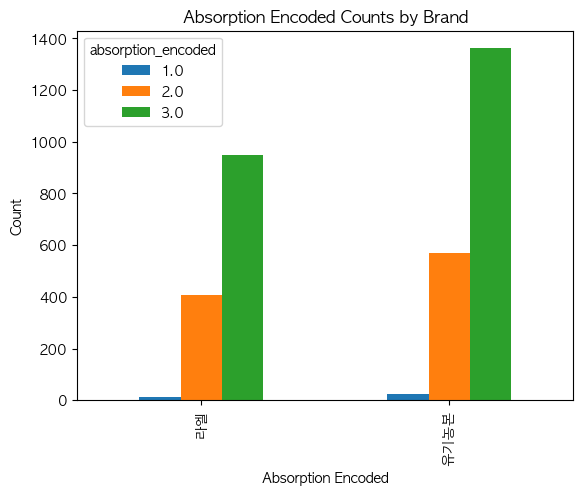

In [308]:
import seaborn as sns
import matplotlib.pyplot as plt

# "라엘"과 "유기농본" 브랜드의 데이터를 선택합니다.
rael_data = df[df['brand_name'] == '라엘']['absorption_encoded']
organic_data = df[df['brand_name'] == '유기농본']['absorption_encoded']

# 각 브랜드에서 "absorption_encoded" 값의 빈도를 계산합니다.
rael_counts = rael_data.value_counts().sort_index()
organic_counts = organic_data.value_counts().sort_index()

# 두 브랜드의 빈도를 하나의 데이터프레임으로 합칩니다.
brand_counts = pd.DataFrame({'라엘': rael_counts, '유기농본': organic_counts})

# Bar 그래프를 그립니다.
brand_counts.T.plot(kind='bar', stacked=False)
plt.title('Absorption Encoded Counts by Brand')
plt.xlabel('Absorption Encoded')
plt.ylabel('Count')
plt.show()

In [306]:
brand_counts.T

absorption_encoded,1.0,2.0,3.0
라엘,13,409,950
유기농본,26,569,1362


In [ ]:
rael_data = df[df['brand_name'] == '라엘']['absorption_encoded']
organic_data = df[df['brand_name'] == '유기농본']['absorption_encoded']

# 각 브랜드에서 "absorption_encoded" 값의 빈도를 계산합니다.
rael_counts = rael_data.value_counts().sort_index()
organic_counts = organic_data.value_counts().sort_index()

brand_counts = pd.DataFrame({'라엘': rael_counts, '유기농본': organic_counts})

In [311]:
brand_counts = pd.DataFrame(df.groupby("brand_name")['absorption_encoded'].value_counts().sort_index())

In [314]:
brand_counts

count
brand_name absorption_encoded       
나트라케어      1.0                     7
           2.0                   121
           3.0                   210
라네이처       1.0                     4
           2.0                   186
           3.0                   330
라엘         1.0                    13
           2.0                   409
           3.0                   950
마리솜        1.0                     1
           2.0                    88
           3.0                   147
순수한면       1.0                    31
           2.0                   375
           3.0                   610
쏘피         1.0                    12
           2.0                   607
           3.0                  1381
아임오        2.0                    45
           3.0                    48
예지미인       1.0                     7
           2.0                   228
           3.0                   484
유기농본       1.0                    26
           2.0                   569
           3.0                  1362
이너시아       1.0                     2
           2.0                   193
           3.0                   804
좋은느낌       1.0                    36
           2.0                  1741
           3.0                  4392
템포         1.0                    46
           2.0                   909
           3.0                  1832
해피문데이      1.0                    31
           2.0                   579
           3.0                  1424
화이트        1.0                    10
           2.0                   224
           3.0                   401

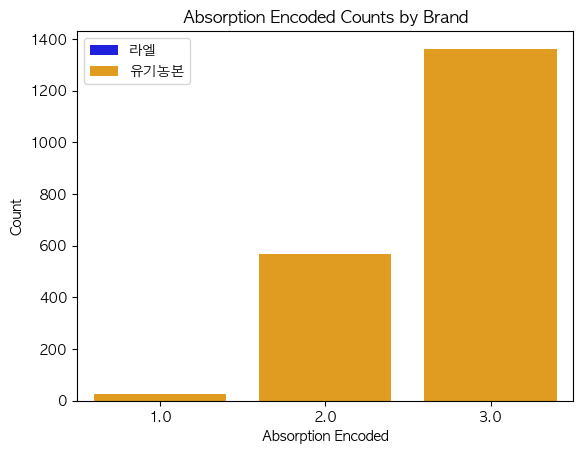

In [317]:
import seaborn as sns
import matplotlib.pyplot as plt

# brand_counts DataFrame에서 "라엘"과 "유기농본" 데이터만 선택
rael_data = brand_counts.loc['라엘']
organic_data = brand_counts.loc['유기농본']

# Bar 그래프를 그립니다.
sns.barplot(x=rael_data.index, y=rael_data['count'], label='라엘', color='blue')
sns.barplot(x=organic_data.index, y=organic_data['count'], label='유기농본', color='orange')

plt.title('Absorption Encoded Counts by Brand')
plt.xlabel('Absorption Encoded')
plt.ylabel('Count')
plt.legend()
plt.show()


#### 가설 4-2) 탐폰 -> 라엘 vs 해피문데이

In [ ]:
# 탐폰 -> 라엘 vs 해피문데이

#### 등분산 검정
- H0: 이분산
- H1: 등분산

In [318]:
from scipy import stats

test_names = ["absorption_encoded", "stimulation_encoded", "texture_encoded", "avg"]

rael_scores = df[(df['brand_name'] == '라엘') & (df["sanitary_type"]=="tampon")][["absorption_encoded", "stimulation_encoded", "texture_encoded", "avg"]]
happy_scores = df[(df['brand_name'] == '해피문데이') & (df["sanitary_type"]=="tampon")][["absorption_encoded", "stimulation_encoded", "texture_encoded", "avg"]]

for test_name in test_names:
    # 결측치를 제거한 후 등분산 검정 수행
    rael_data = rael_scores[test_name].dropna()
    happy_data = happy_scores[test_name].dropna()

    _, p_value_levene = stats.levene(rael_data, happy_data)
    if p_value_levene > 0.05:
        print(f"{test_name} p-value: {p_value_levene}, 등분산 가정 만족")
    else:
        print(f"{test_name} p-value: {p_value_levene}, 이분산 가정 만족")
        
# 모두 이분산 가정을 만족함

absorption_encoded p-value: 2.0737686984696208e-07, 이분산 가정 만족
stimulation_encoded p-value: 1.4992455173749946e-07, 이분산 가정 만족
texture_encoded p-value: 4.792119989584736e-09, 이분산 가정 만족
avg p-value: 2.6143778119924797e-07, 이분산 가정 만족


#### t-test 진행
- H0: 두 그룹의 평균이 같다.
- H1: 라엘 평균 점수가 해피문데이 평균 점수보다 높을 것이다.

In [319]:
t_statistic, p_value = stats.ttest_ind(
    a=rael_scores,
    b=happy_scores,
    alternative="greater",    # a > b
    equal_var=True,
    nan_policy="omit"     # nan값 무시하고 진행
)
print(f"p-value: {p_value}")
print(f"귀무 가설 기각: {p_value < 0.05}")

p-value: [0.9999999  0.99999993 1.         1.        ]
귀무 가설 기각: [False False False False]


## 컵형 label encoding

## 컵형 -> nouns에 '재구매' 있으면 1, 없으면 0

In [6]:
print(df[df["sanitary_type"]=="cup"].iloc[0]["nouns"])

['원래', '루나컵', '링', '라지', '품절', '링', '스몰', '사이즈', '구매', '경도', '딱', '안', '잘', '정말', '아무것', '안', '방광', '압박', '없', '편하', '참고', '때', '리비아', '폴', '드', '폴', '드', '사용', '제일', '잘', '기존', '탐폰', '편하', '다음', '라지', '사이즈', '구매', '많', '날', '스몰', '라지', '사이즈', '적합', '많', '날', '스몰', '자주', '번거롭', '사람', '다르', '많', '날', '생각', '혈', '금방', '생리컵', '앞으로', '계속', '폐', '때', '동안', '쭉', '사용', '같', '고리', '때', '수월', '입문자', '꼬리', '고리', '제일', '나은', '루나컵', '링', '입문자', '제일', '무난', '경도', '말랑', '탄성', '좋아서', '쓰기', '편하', '같', '티읕컵', '같', '좀', '하드', '제품', '첨', '때', '힘들', '때', '실링', '힘들', '생리컵', '때', '밑', '힘', '손가락', '이용', '지속', '대변', '볼', '때', '골반', '근육', '힘', '압력', '자궁', '탈장', '골반', '장기', '탈출', '증', '이란', '부작용', '안', '좋', '생리컵', '인해', '자궁', '하수', '섭', '때', '최대한', '손가락', '이용', '생리컵', '꾹', '실링', '제대로', '살살', '생리컵', '처음', '참고']


In [7]:
from tqdm import tqdm

tqdm.pandas()
df["nouns"] = df["nouns"].progress_apply(lambda x: eval(x))

100%|██████████████████████████████████████████████████████████████████████████| 21992/21992 [00:00<00:00, 44467.81it/s]


In [8]:
# "nouns"에 "재구매" 키워드가 있는지 확인
# >> "repurchase" 컬럼에 1 또는 0 할당
df["repurchase"] = df["nouns"].apply(lambda x: 1 if "재구매" in x else 0)

In [10]:
print(df["repurchase"].iloc[3])

0


In [35]:
# 브랜드별 repurchase 수 카운트
df.groupby("brand_name")["repurchase"].sum()

brand_name
나트라케어     18
라네이처      26
라엘       127
루나        13
마리솜       11
순수한면      89
쏘피       247
아임오       14
예지미인      41
유기농본     151
이너시아      88
좋은느낌     389
템포       207
티읕        20
한나         2
해피문데이    121
화이트       33
Name: repurchase, dtype: int64

In [11]:
from matplotlib import pyplot as plt

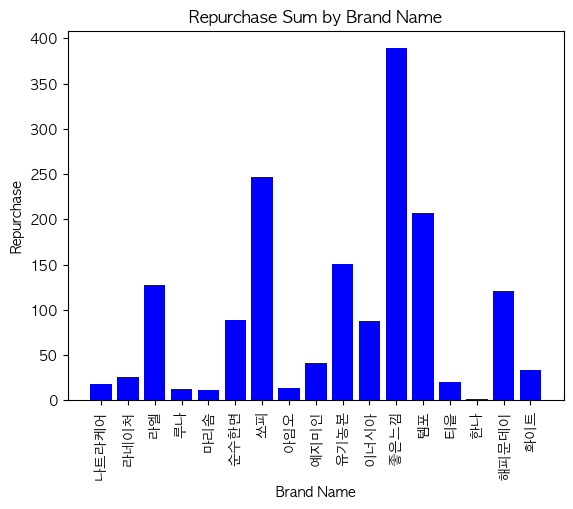

In [12]:
# '재구매' 키워드가 있는 브랜드 카운트
grouped_df = df.groupby("brand_name")["repurchase"].sum()

plt.rc("font", family="AppleGothic")
plt.bar(grouped_df.index, grouped_df.values, color='blue')
plt.xlabel('Brand Name')
plt.xticks(rotation=90)
plt.ylabel('Repurchase')
plt.title('Repurchase Sum by Brand Name')
plt.show()

In [21]:
grouped_sum_cup = df[df["sanitary_type"]=="cup"].groupby("brand_name")["repurchase"].sum()

In [22]:
grouped_ratio_cup = df[df["sanitary_type"]=="cup"].groupby("brand_name")["repurchase"].mean()

Text(0.5, 1.0, 'Repurchase Ratio')

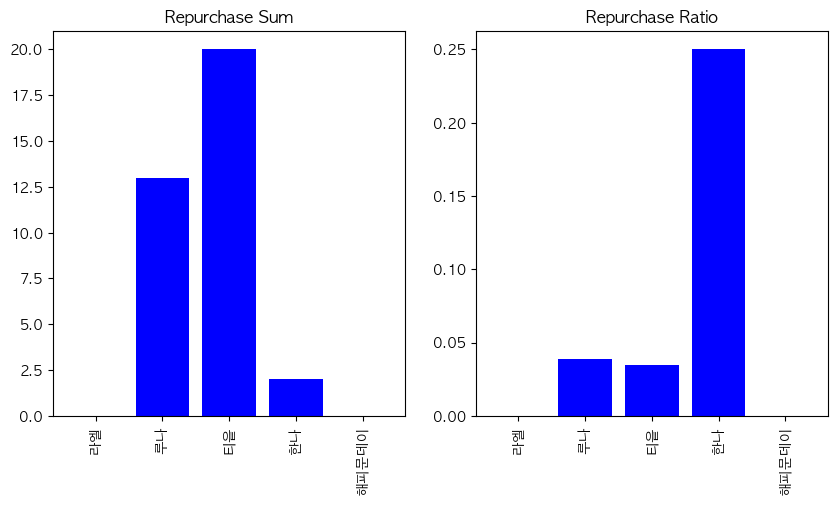

In [23]:
# 생리컵 -> "재구매" 키워드
plt.figure(figsize=(10,5))
plt.rc("font", family="AppleGothic")

plt.subplot(1, 2, 1)
plt.bar(grouped_sum_cup.index, grouped_sum_cup.values, color='blue')
plt.xticks(rotation=90)
plt.title('Repurchase Sum')

plt.subplot(1, 2, 2)
plt.bar(grouped_ratio_cup.index, grouped_ratio_cup.values, color='blue')
plt.xticks(rotation=90)
plt.title('Repurchase Ratio')

# >> 비율 그래프에서 '한나'는 제외하고 생각 -> '한나' 전체 리뷰 데이터 8개임 그 중에서 2개에서 '재구매' 키워드 발생. 
# => 유의하지 않는 결과라고 생각해서 '한나'는 제외하고 생각

In [25]:
df[df["sanitary_type"]=="cup"].groupby("brand_name")["repurchase"].sum()

brand_name
라엘        0
루나       13
티읕       20
한나        2
해피문데이     0
Name: repurchase, dtype: int64

In [24]:
# 재구매 / 전체 -> 재구매 비율
df[df["sanitary_type"]=="cup"].groupby("brand_name")["repurchase"].mean()

brand_name
라엘       0.000000
루나       0.038690
티읕       0.034423
한나       0.250000
해피문데이    0.000000
Name: repurchase, dtype: float64

## 컵형 -> nouns에 '쉽' 있으면 2, '어렵' 또는 '어려' 있으면 1, 어떤 키워드도 없으면 0

In [9]:
# "nouns" 컬럼의 각 리스트에 대해 "쉽", "어렵", "어려" 키워드를 확인하고 "usability" 컬럼 설정
df["usability"] = df["nouns"].apply(lambda x: 2 if any(keyword in x for keyword in ['쉽']) else (1 if any(keyword in x for keyword in ['어렵', '어려']) else 0))

In [27]:
df[(df["usability"]==2) & (df["sanitary_type"]=="cup")]

,item_number,brand_name,sanitary_type,item_option,review_content,absorption_encoded,stimulation_encoded,texture_encoded,nouns,avg,repurchase,usability
11820,A000000154732,루나,cup,링 스몰(27ml),쇼티 타이니 쓰다가 조금 더 크고 쉽게 빼고 싶어서 링 스몰로 재구매했는데 좋네요 ...,NaN,NaN,NaN,"[쇼, 티, 타, 조금, 더, 크, 쉽, 링, 스몰, 재구매, 좋, 양, 같이, 사용]",NaN,1,2
11837,A000000154732,루나,cup,링 스몰(27ml),예전부터 사고는 싶었는데 이 게 제약도 많고 알아봐야 할것도 많고 그리고 가장 중요...,NaN,NaN,NaN,"[예전, 사고, 게, 제약, 많, 많, 가장, 중요, 판매, 곳, 적, 마침, 올리...",NaN,0,2
11839,A000000154732,루나,cup,링 스몰(27ml),배송 도착했고 구성 너무 마음에 드네요 배지 너무 귀여워요 구성 너무 마음에 듭...,NaN,NaN,NaN,"[배, 송, 도착, 구성, 너무, 마음, 배지, 너무, 귀엽, 구성, 너무, 마음,...",NaN,0,2
11847,A000000154732,루나,cup,링 타이니(22ml),탐폰으로 신세계를 만났는데 탐폰은 밤에 착용할 수 없다는 충격적인 사실 하지만 이미...,NaN,NaN,NaN,"[탐폰, 신세계, 탐폰, 밤, 착용, 없, 충격, 사실, 이미, 편리, 사람, 다시...",NaN,0,2
11857,A000000154732,루나,cup,링 스몰(27ml),리뷰 등록 300자 이상 썼는데 날라가서 다시 써요 주변에서 사용하는 사람들이 추...,NaN,NaN,NaN,"[리뷰, 등록, 이상, 다시, 주변, 사용, 사람, 추천, 고민, 생리대, 자유, ...",NaN,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
12760,A000000178799,라엘,cup,라엘컵 사이즈1,탐폰만 N년째 사용중이고 생리컵도 도전해보고싶었는데 예전에는 직구로 구입을해야하고...,NaN,NaN,NaN,"[탐폰, 사용, 생리컵, 도전, 예전, 직구, 구입, 접근성, 쉽, 올영, 생리컵,...",NaN,0,2
12764,A000000178799,라엘,cup,라엘컵 사이즈1,우선 생리컵 종류도 많아지고 구매하기도 쉬워져서 너모 좋네요 재질이 딱딱하지 않고 ...,NaN,NaN,NaN,"[우선, 생리컵, 종류, 많, 구매, 쉽, 모, 좋, 재질, 딱딱, 휴대, 파우치,...",NaN,0,2
12767,A000000185976,해피문데이,cup,해피문데이 베이직 컵-숏,체험단 후기 작성기간이 생리 시작보다 먼저라서 일단 손으로 느껴본 강도는 적당히 말...,NaN,NaN,NaN,"[체험, 단, 후기, 작성, 기간, 생리, 시작, 먼저, 일단, 손, 강도, 적당히...",NaN,0,2
12769,A000000185976,해피문데이,cup,해피문데이 베이직 컵-숏,이번에 체험단으로 기회가 되어 해피문데이의 생리컵을 받아보게 되었는데요 사실 저는...,NaN,NaN,NaN,"[이번, 체험, 단, 기회, 해피문데이, 생리컵, 사실, 생리컵, 사, 용해, 본적...",NaN,0,2


In [29]:
len(df[(df["usability"]==2) & (df["sanitary_type"]=="cup") & (df["brand_name"]=="티읕")])

60

In [32]:
df[(df["usability"]==2) & (df["sanitary_type"]=="cup") & (df["brand_name"]=="티읕")]["usability"].sum()

120

In [88]:
grouped_sum_cup = df[df["sanitary_type"]=="cup"].groupby("brand_name")["usability"].sum()

In [89]:
grouped_mean_cup = df[df["sanitary_type"]=="cup"].groupby("brand_name")["usability"].mean()

Text(0.5, 1.0, 'Usability Mean')

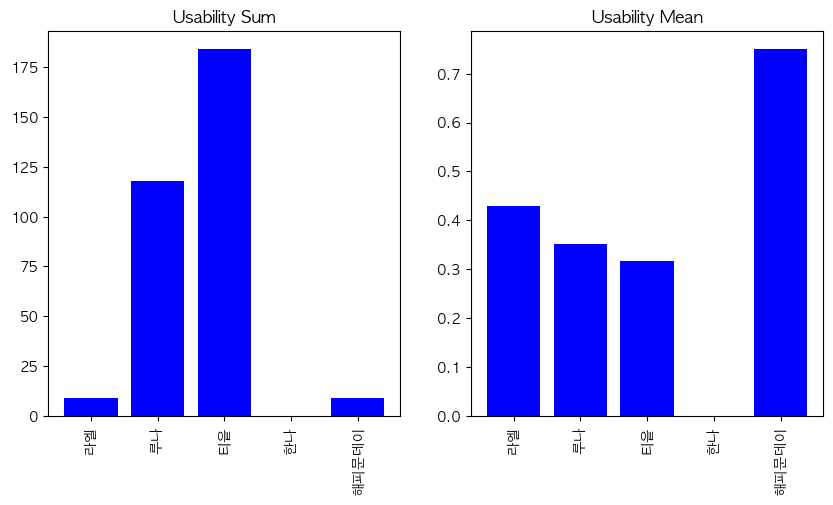

In [90]:
# 생리컵 -> "사용성" 키워드
plt.figure(figsize=(10,5))
plt.rc("font", family="AppleGothic")

plt.subplot(1, 2, 1)
plt.bar(grouped_sum_cup.index, grouped_sum_cup.values, color='blue')
plt.xticks(rotation=90)
plt.title('Usability Sum')

plt.subplot(1, 2, 2)
plt.bar(grouped_mean_cup.index, grouped_mean_cup.values, color='blue')
plt.xticks(rotation=90)
plt.title('Usability Mean')

In [35]:
df[df["sanitary_type"]=="cup"].groupby("brand_name")["usability"].mean()

brand_name
라엘       0.428571
루나       0.351190
티읕       0.316695
한나       0.000000
해피문데이    0.750000
Name: usability, dtype: float64

## 컵형 -> nouns에 '편하', '편한' 있으면 2, '불편' 있으면 1, 어떤 키워드도 없으면 0

In [10]:
df["convenience"] = df["nouns"].apply(lambda x: 2 if any(keyword in x for keyword in ['편하', '편한']) else (1 if any(keyword in x for keyword in ['불편']) else 0))


In [32]:
df[(df["convenience"]==1) & (df["sanitary_type"]=="cup")]

,item_number,brand_name,sanitary_type,item_option,review_content,absorption_encoded,stimulation_encoded,texture_encoded,nouns,avg,repurchase,usability,convenience
11846,A000000154732,루나,cup,링 스몰(27ml),초심자인데 링 추천이 많길래 사봤어요 사용해보니 링이 없으면 뺄때 정말 불편할 것 ...,NaN,NaN,NaN,"[초심자, 링, 추천, 많, 사용, 링, 없, 때, 정말, 불편, 같, 여름, 생리...",NaN,0,0,1
11847,A000000154732,루나,cup,링 타이니(22ml),탐폰으로 신세계를 만났는데 탐폰은 밤에 착용할 수 없다는 충격적인 사실 하지만 이미...,NaN,NaN,NaN,"[탐폰, 신세계, 탐폰, 밤, 착용, 없, 충격, 사실, 이미, 편리, 사람, 다시...",NaN,0,2,1
11854,A000000154732,루나,cup,링 스몰(27ml),처음 써보는 생리컵에 두려움이 많았는데 생리통 완화 생리대의 불편함 감소 등으로 도...,NaN,NaN,NaN,"[처음, 생리컵, 두려움, 많, 생리통, 완화, 생리대, 불편, 감소, 도전, 확실...",NaN,0,1,1
11863,A000000154732,루나,cup,링 스몰(27ml),여름이고 해서 생리대 너무 불편해서 생리컵 사봤는데 기대돼요,NaN,NaN,NaN,"[여름, 생리대, 너무, 불편, 생리컵, 기대]",NaN,0,0,1
11869,A000000154732,루나,cup,링 라지(35ml),링이 없는 그냥 루나컵 2년 동안 잘 사용했는데 요즘 실링이 잘 안 되더라고요 그래...,NaN,NaN,NaN,"[링, 없, 그냥, 루나컵, 동안, 잘, 사용, 요즘, 실링, 잘, 안, 올리브영,...",NaN,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12751,A000000178799,라엘,cup,라엘컵 사이즈1,하필 그날이 끝나는 날에 늦게 도착해서 사용은 바로 못해봤어요 일단 사이즈는 중...,NaN,NaN,NaN,"[하필, 그날, 날, 늦, 도착, 사용, 바로, 일단, 사이즈, 중간, 컵, 사이즈...",NaN,0,0,1
12765,A000000185976,해피문데이,cup,해피문데이 베이직 컵-숏,다른 생리컵 사용하다 교체하며 해피문데이꺼 사봤어요 저는 밖에서는 생리컵 갈기 불편...,NaN,NaN,NaN,"[생리컵, 사용, 교체, 해피문데이, 밖, 생리컵, 갈기, 불편, 집, 때, 잘, ...",NaN,0,0,1
12768,A000000185976,해피문데이,cup,해피문데이 베이직 컵-숏,생리대에 불편함을 느끼던 중 다양한 종류의 제품을 써보고 싶다고 생각하던 차에 생리...,NaN,NaN,NaN,"[생리대, 불편, 다양, 종류, 제품, 생각, 차, 생리컵, 체험, 단, 사용, 딱...",NaN,0,1,1
12769,A000000185976,해피문데이,cup,해피문데이 베이직 컵-숏,이번에 체험단으로 기회가 되어 해피문데이의 생리컵을 받아보게 되었는데요 사실 저는...,NaN,NaN,NaN,"[이번, 체험, 단, 기회, 해피문데이, 생리컵, 사실, 생리컵, 사, 용해, 본적...",NaN,0,2,1


In [84]:
grouped_sum_cup = df[df["sanitary_type"]=="cup"].groupby("brand_name")["convenience"].sum()

In [85]:
grouped_mean_cup = df[df["sanitary_type"]=="cup"].groupby("brand_name")["convenience"].mean()

Text(0.5, 1.0, 'Convenience Mean')

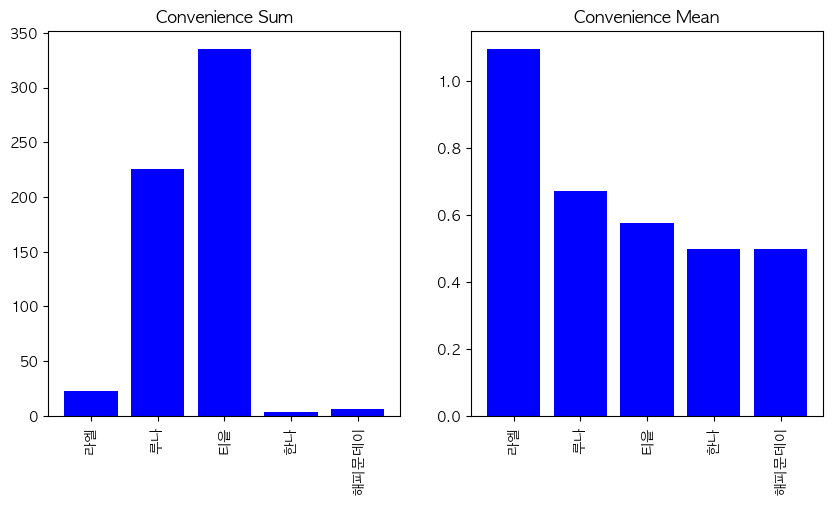

In [87]:
# 생리컵 -> "편리성" 키워드
plt.figure(figsize=(10,5))
plt.rc("font", family="AppleGothic")

plt.subplot(1, 2, 1)
plt.bar(grouped_sum_cup.index, grouped_sum_cup.values, color='blue')
plt.xticks(rotation=90)
plt.title('Convenience Sum')

plt.subplot(1, 2, 2)
plt.bar(grouped_mean_cup.index, grouped_mean_cup.values, color='blue')
plt.xticks(rotation=90)
plt.title('Convenience Mean')

### 컵형 label encoding 평균 

In [11]:
df["cup_avg"] = df[["repurchase", "usability", "convenience"]].mean(axis=1)

In [67]:
df[df["brand_name"]=="한나"][["repurchase", "usability", "convenience", "cup_avg"]]

,repurchase,usability,convenience,cup_avg
12525,0,0,0,0.000000
12526,0,0,0,0.000000
12527,0,0,1,0.333333
12528,0,0,1,0.333333
12529,0,0,0,0.000000
12530,0,0,0,0.000000
12531,1,0,0,0.333333
12532,1,0,2,1.000000


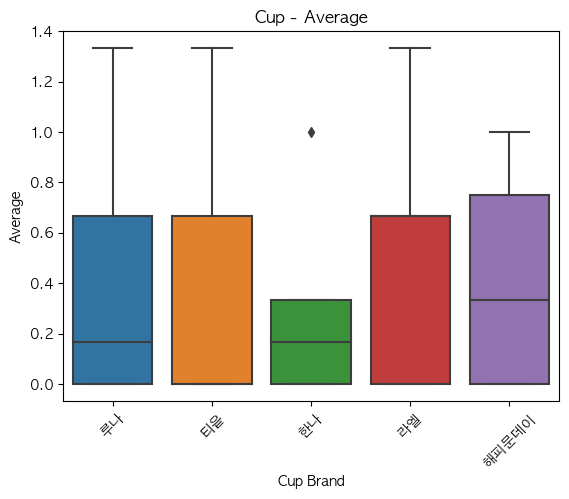

In [66]:
plt.rc("font", family="AppleGothic")
sns.boxplot(x="brand_name", y="cup_avg", data=cup_brand)

plt.title("Cup - Average")
plt.xlabel("Cup Brand")
plt.xticks(rotation=45)
plt.ylabel("Average")

plt.show()

# >> '한나' 이상치 -> 대부분 재구매, 사용성, 편리성에서 0 또는 1 값을 가지는데, 하나만 편리성에서 2 값을 가짐. 
# 티읕과 라엘 

In [131]:
df.head(3)

,item_number,brand_name,sanitary_type,item_option,review_content,absorption_encoded,stimulation_encoded,texture_encoded,nouns,avg,repurchase,usability,convenience,cup_avg
0,A000000191350,마리솜,pad,,너무 귀여워서 살수 밖에 없었어요 사실 쿠로미 가지고싶었는데 마멜 당첨 됬지만 너무...,3.0,2.0,3.0,"[너무, 귀엽, 살수, 밖, 없, 사실, 쿠로미, 마멜, 당첨, 너무, 귀엽, 마멜...",2.666667,0,0,0,0.0
1,A000000191350,마리솜,pad,,종류별로 다양하게 담겨있어서 좋아요 오버나이트가 급히 필요해서 뜯어 써봤는데 진짜...,2.0,3.0,2.0,"[종류, 다양, 좋, 오버나이트, 급히, 필요, 진짜, 좋, 추천, 합, 당]",2.333333,0,0,0,0.0
2,A000000193819,마리솜,pad,,조카가 얼마전에 생리시작해서 생리대 선물해 주려고했는데 마침 퍼스트박스 세트가 있어...,3.0,3.0,3.0,"[조카, 얼마, 전, 생리, 시작, 생리대, 선물, 마침, 퍼스트, 박스 세트, 구...",3.000000,0,0,0,0.0


### 티읕과 라엘의 평균이 정말 같을까? >> t-test 진행

In [91]:
from scipy import stats

#### 등분산 검정
- H0: 이분산
- H1: 등분산

In [94]:
from scipy import stats

test_names = ['repurchase', 'usability', 'convenience', 'cup_avg']

t_scores = df[(df['sanitary_type'] == 'cup') & (df["brand_name"]=="티읕")][['repurchase', 'usability', 'convenience', 'cup_avg']]
r_scores = df[(df['sanitary_type'] == 'cup') & (df["brand_name"]=="라엘")][['repurchase', 'usability', 'convenience', 'cup_avg']]

for test_name in test_names:
    # 결측치를 제거한 후 등분산 검정 수행
    t_data = t_scores[test_name].dropna()
    r_data = r_scores[test_name].dropna()

    _, p_value_levene = stats.levene(t_data, r_data)
    if p_value_levene > 0.05:
        print(f"{test_name} p-value: {p_value_levene}, 등분산 가정 만족")
    else:
        print(f"{test_name} p-value: {p_value_levene}, 이분산 가정 만족")

# 모두 등분산 가정 만족함

repurchase p-value: 0.38803486682584243, 등분산 가정 만족
usability p-value: 0.4435140103584516, 등분산 가정 만족
convenience p-value: 0.08275653854139314, 등분산 가정 만족
cup_avg p-value: 0.9207933204743548, 등분산 가정 만족


#### t-test 진행
- H0: 두 그룹의 평균의 차이는 0이다. => 두 그룹의 평균이 같다.
- H1: 두 그룹의 평균의 차이는 0이 아니다 => 두 그룹의 평균이 같지 않다.

In [95]:
t_statistic, p_value = stats.ttest_ind(
    a=t_scores,
    b=r_scores,
    alternative="two-sided",    # 양측
    equal_var=True,
    nan_policy="omit"     # nan값 무시하고 진행
)
print(f"p-value: {p_value}")
print(f"귀무 가설 기각: {p_value < 0.05}")

# 재구매와 사용성에서는 유의확률이 유의수준 0.05 보다 크기때문에 귀무가설을 기각할 수 없음.
# >> 따라서 재구매와 사용성에서는 두 그룹의 평균이 같다고 할 수 있다.

# 편리성과 전체 평균에서는 유의확률이 유의수준 0.05 보다 작기때문에 귀무가설을 기각한다.
# >> 따라서 편리성과 전체 평균에서는 두 그룹의 평균이 같지 않다고 할 수 있다.

p-value: [0.38803487 0.44351401 0.00620469 0.01757706]
귀무 가설 기각: [False False  True  True]


In [12]:
df.head(3)

,item_number,brand_name,sanitary_type,item_option,review_content,absorption_encoded,stimulation_encoded,texture_encoded,nouns,avg,repurchase,usability,convenience,cup_avg
0,A000000191350,마리솜,pad,,너무 귀여워서 살수 밖에 없었어요 사실 쿠로미 가지고싶었는데 마멜 당첨 됬지만 너무...,3.0,2.0,3.0,"[너무, 귀엽, 살수, 밖, 없, 사실, 쿠로미, 마멜, 당첨, 너무, 귀엽, 마멜...",2.666667,0,0,0,0.0
1,A000000191350,마리솜,pad,,종류별로 다양하게 담겨있어서 좋아요 오버나이트가 급히 필요해서 뜯어 써봤는데 진짜...,2.0,3.0,2.0,"[종류, 다양, 좋, 오버나이트, 급히, 필요, 진짜, 좋, 추천, 합, 당]",2.333333,0,0,0,0.0
2,A000000193819,마리솜,pad,,조카가 얼마전에 생리시작해서 생리대 선물해 주려고했는데 마침 퍼스트박스 세트가 있어...,3.0,3.0,3.0,"[조카, 얼마, 전, 생리, 시작, 생리대, 선물, 마침, 퍼스트, 박스 세트, 구...",3.000000,0,0,0,0.0


In [17]:
# heatmap_df = df.dropna(subset=["absorption_encoded", "stimulation_encoded", "texture_encoded"])
# heatmap_df

In [22]:
heatmap_df = heatmap_df.dropna(subset=["absorption_encoded", "stimulation_encoded", "texture_encoded"])[["absorption_encoded", "stimulation_encoded", "texture_encoded"]]
heatmap_df["repurchase"] = df["repurchase"]
heatmap_df["usability"] = df["usability"]
heatmap_df["convenience"] = df["convenience"]

In [23]:
heatmap_df

,absorption_encoded,stimulation_encoded,texture_encoded,repurchase,usability,convenience
0,3.0,2.0,3.0,0,0,0
1,2.0,3.0,2.0,0,0,0
2,3.0,3.0,3.0,0,0,0
3,3.0,3.0,3.0,0,0,0
4,2.0,2.0,2.0,0,0,0
...,...,...,...,...,...,...
21987,3.0,3.0,3.0,0,0,0
21988,2.0,2.0,2.0,0,0,0
21989,3.0,3.0,3.0,0,0,0
21990,2.0,2.0,2.0,0,0,0


Text(0.5, 1.0, 'Heatmap')

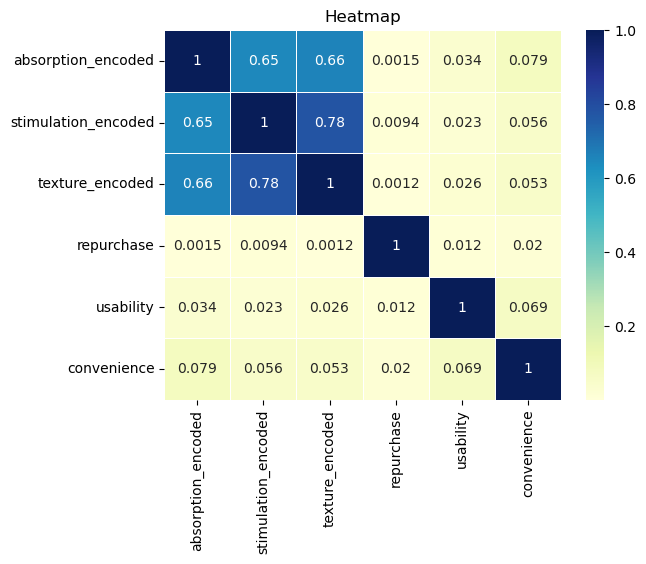

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(
    heatmap_df.corr(),
    annot=True,
    linewidth=0.5,
    cmap="YlGnBu"
)

# 그래프 출력
plt.title("Heatmap")
# plt.show()
